In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/mq_variants_intensity_cleaned.csv')
df = df[~df["Proteins"].str.contains(";", na=False)]

In [3]:
df.columns = [c.replace('_dyn_#', '').split('.')[0] for c in df.columns]

In [4]:
df.head()

,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,Charge,Num Mods,...,Barasertib_HQPA DMSO,Baricitinib 1000nM,Baricitinib 100nM,Baricitinib 10nM,Baricitinib 30000nM,Baricitinib 3000nM,Baricitinib 300nM,Baricitinib 30nM,Baricitinib 3nM,Baricitinib DMSO
1,.LGEHNIDVLEGNEQFINAAK.,50733,.LGEHNIDVLEGNEQFINAAK.,8878,23098,134,TRYP_PIG,2211.1,2,0,...,0.0,-1.532865,0.076278,0.107261,-1.337973,-1.782213,-1.034816,0.001841,-0.739839,0.0
4,.NYLLSLPHK.,68115,.NYLLSLPHK.,7445,11842,41,sp|P28482|MK01_HUMAN,1084.6,2,0,...,0.0,2.405718,3.461120,3.757845,2.516899,2.784061,2.735264,3.449290,3.054920,0.0
9,.KLEAAEDIAYQLSR.,44634,.KLEAAEDIAYQLSR.,4958,6905,36,sp|P35232|PHB_HUMAN,1606.8,2,0,...,0.0,-0.880604,0.579253,0.272519,-0.707921,-0.744806,-0.676900,0.080004,0.004860,0.0
11,.IITHPNFNGNTLDNDIMLIK.,37659,.IITHPNFNGNTLDNDIMLIK.,4830,20735,81,TRYP_PIG,2283.2,2,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,.L+28.003GEHNIDVLEGNEQFINAAK.,50735,.LGEHNIDVLEGNEQFINAAK.,3782,23098,134,TRYP_PIG,2239.1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
target_protein = "sp|Q8TD19|NEK9_HUMAN"
target_drug = "Alectinib"

In [6]:
def extract_concentration(col: str):
    """Extract numeric concentration from column name."""
    return int(col.split()[1].split("nM")[0])

In [7]:
columns = [col for col in df.columns if target_drug in col and "DMSO" not in col]
columns = sorted(columns, key=extract_concentration)
columns.insert(0, "Variant")
print(columns)

['Variant', 'Alectinib 3nM', 'Alectinib 10nM', 'Alectinib 30nM', 'Alectinib 100nM', 'Alectinib 300nM', 'Alectinib 1000nM', 'Alectinib 3000nM', 'Alectinib 30000nM']


In [8]:
df_target = df[df["Proteins"] == target_protein][columns]

In [9]:
drug_columns = columns[1:]

In [10]:
df_target.dropna(how="all", subset=drug_columns, inplace=True)

In [11]:
df_target

,Variant,Alectinib 3nM,Alectinib 10nM,Alectinib 30nM,Alectinib 100nM,Alectinib 300nM,Alectinib 1000nM,Alectinib 3000nM,Alectinib 30000nM
97,.LGLDSEEDYYTPQKVDVPK.,0.095273,0.320353,0.589963,0.662604,0.433910,-1.340413,-1.026994,-2.224523
111,.LGLDSEEDYYTPQK.,0.249554,0.504875,0.433486,0.031914,-0.491066,-0.641645,-0.532654,-0.908406
147,.VSC+57.021GDEFTIAATDDNHIFAWGNGGNGR.,0.495985,1.461948,1.011063,0.811369,1.447513,-0.570747,-0.757506,-1.298720
152,.GWHTILIVEK.,0.385942,0.386378,0.664836,0.332926,1.435142,-0.316423,-0.431472,-0.357037
239,.VASEAPLEHKPQVEASSPR.,0.401598,0.481963,0.171370,0.334749,1.583011,-0.425974,0.233157,-0.192430
358,.QVC+57.021AGNTHFAVVTVEK.,0.800885,0.821741,1.266578,0.888423,1.559404,-0.741204,-0.993368,-1.024672
395,.PIFGSLHHVPDLSC+57.021R.,0.187844,0.224559,0.423914,0.025397,1.343106,-0.293569,-0.704925,-0.445662
398,.VTLLNAPTK.,-0.065347,0.195965,0.362807,0.389815,1.458697,-0.930252,-0.944215,-0.902935
407,.SSTVTEAPIAVVTSR.,0.438364,0.437944,0.838914,0.331490,0.984582,-0.826949,-0.846871,-0.895477
408,.LQQENLQIFTQLQK.,0.575610,0.783651,0.817847,0.910414,1.539229,-0.430472,-0.332441,-0.620377


In [12]:
df_target.set_index("Variant", inplace=True)

In [13]:
df_target

,Alectinib 3nM,Alectinib 10nM,Alectinib 30nM,Alectinib 100nM,Alectinib 300nM,Alectinib 1000nM,Alectinib 3000nM,Alectinib 30000nM
Variant,,,,,,,,
.LGLDSEEDYYTPQKVDVPK.,0.095273,0.320353,0.589963,0.662604,0.433910,-1.340413,-1.026994,-2.224523
.LGLDSEEDYYTPQK.,0.249554,0.504875,0.433486,0.031914,-0.491066,-0.641645,-0.532654,-0.908406
.VSC+57.021GDEFTIAATDDNHIFAWGNGGNGR.,0.495985,1.461948,1.011063,0.811369,1.447513,-0.570747,-0.757506,-1.298720
.GWHTILIVEK.,0.385942,0.386378,0.664836,0.332926,1.435142,-0.316423,-0.431472,-0.357037
.VASEAPLEHKPQVEASSPR.,0.401598,0.481963,0.171370,0.334749,1.583011,-0.425974,0.233157,-0.192430
.QVC+57.021AGNTHFAVVTVEK.,0.800885,0.821741,1.266578,0.888423,1.559404,-0.741204,-0.993368,-1.024672
.PIFGSLHHVPDLSC+57.021R.,0.187844,0.224559,0.423914,0.025397,1.343106,-0.293569,-0.704925,-0.445662
.VTLLNAPTK.,-0.065347,0.195965,0.362807,0.389815,1.458697,-0.930252,-0.944215,-0.902935
.SSTVTEAPIAVVTSR.,0.438364,0.437944,0.838914,0.331490,0.984582,-0.826949,-0.846871,-0.895477


<Axes: ylabel='Variant'>

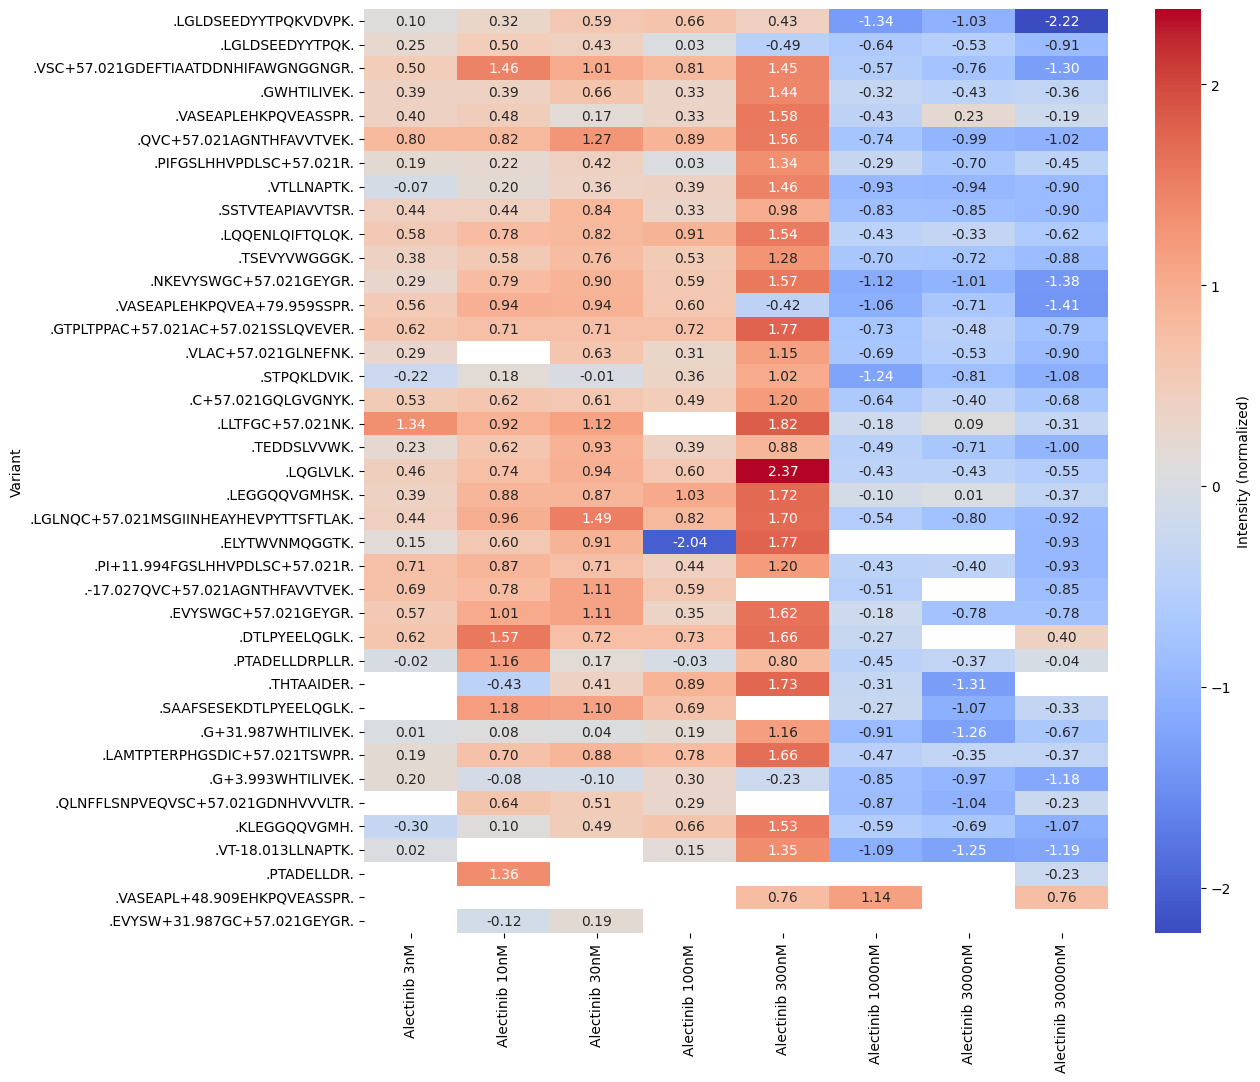

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_target,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Intensity (normalized)"},
)